<a href="https://colab.research.google.com/github/MichalDV6/Python-Stack-Exchange-Analysis/blob/main/Project_3_Python_Stack_Exchange_Michal_David_(2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Stack Exchange Data Analysis







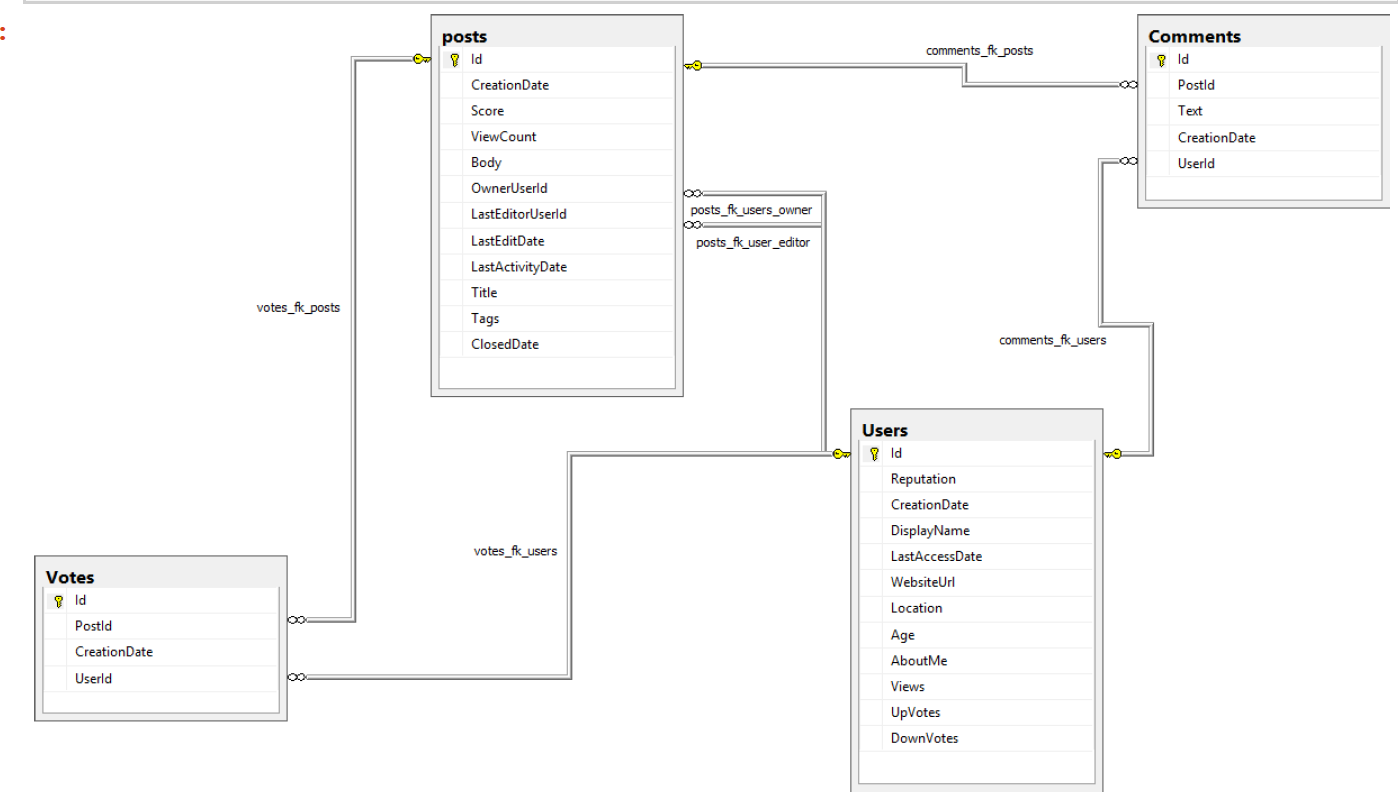

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import numpy as np


In [ ]:
from google.colab import files 
import io
uploaded = files.upload()

Saving Posts.csv to Posts.csv


In [ ]:
df_posts = pd.read_csv(
    # defines the file location
    filepath_or_buffer = "Posts.csv",
    # defines the file delimiter
    delimiter = ",",
    # '0' - Tells Pandas that the first row is NOT a header
    header = 0,
    # defines the header names, using it because header = 0
    names = ["Id","CreationDate","Score","ViewCount","Body","OwnerUserId","LastEditorUserId","LastEditDate",\
             "LastActivityDate","Title","Tags","ClosedDate"],
    # Manually defining column types except dates 
    dtype = {"Id":int,
             "Score":int,
             "ViewCount":str,
             "Body":str,
             "OwnerUserId":int,
             "LastEditorUserId":int,
             "Title":str,
             "Tags":str},
    index_col = "Id",
    parse_dates = ["CreationDate", "LastEditorUserId", "LastActivityDate", "ClosedDate"])

In [ ]:
from google.colab import files 
import io
uploaded = files.upload()

Saving comments.csv to comments.csv


In [ ]:
df_comments = pd. read_csv(
    filepath_or_buffer = "comments.csv",
    delimiter = ",",
    header = 0,
    names = ["Id","PostId","Text","CreationDate","UserId"],
    dtype = {"Id":int,
             "PostId":int,
             "Text":str,
             "UserId":int},
    index_col = "Id",
    parse_dates = ["CreationDate"]
)

In [ ]:
from google.colab import files 
import io
uploaded = files.upload()

Saving Users.csv to Users.csv


In [ ]:
df_users = pd. read_csv(
    filepath_or_buffer = "Users.csv",
    delimiter = ",",
    header = 0,
    names = ["Id","Reputation","CreationDate","DisplayName","LastAccessDate","WebsiteUrl","Location",\
             "Age","AboutMe","Views","UpVotes","DownVotes"],
    dtype = {"Id":int,
             "Reputation":int,
             "DisplayName":str,
             "WebsiteUrl":str,
             "Location":str,
             "Age":float,
             "AboutMe":str,
             "Views":int,
             "UpVotes":int,
             "DownVotes":int},
    index_col = "Id",
    parse_dates = ["CreationDate","LastAccessDate"]
)

In [ ]:
from google.colab import files 
import io
uploaded = files.upload()

Saving Votes.csv to Votes.csv


In [ ]:
df_votes = pd. read_csv(
    filepath_or_buffer = "Votes.csv",
    delimiter = ",",
    header = 0,
    names = ["Id","PostId","CreationDate","UserId"],
    dtype = {"Id":int,
             "PostId":int,
             "UserId":int},
    index_col = "Id",
    parse_dates = ["CreationDate"]    
)

# 1. How many post were made each year ?


In [ ]:
# In order to get the number of posts by each year, I used the 'groupby' operator on the 'CreationDate' column (which has been converted to a 'year' using 'datetime' library).
# Then, I used the 'count' function on the 'Title' column, in order to get the number of posts created by each year.
# At the end, I used the 'to_frame' in order to convert Series to DataFrame.

df_posts.groupby(df_posts['CreationDate'].dt.year)['Title'].count().to_frame()

,Title
CreationDate,
2011,156
2012,1065
2013,1018


# 2. How many votes were made in each day of the week (Sunday, Monday, Tuesday, etc.)?


In [ ]:
# First of all, it is necessary to define a function that returns the day of the week:

def NameOfDay(day_num):
  DayName = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
  return DayName[day_num] 

In [ ]:
# Adding a new column to Votes data_frame:

df_votes['DayOfWeek'] = df_votes['CreationDate'].dt.dayofweek.apply(NameOfDay)

In [ ]:
# Counting the number of votes per day by using 'count' function.
# In order to receive the 'DayOfWeek' and 'NumOfVotes' columns, it's required to use the 'groupby' operator.
# Then, to rename the 'PostId' column to 'NumOfVotes'.

df_votes.groupby('DayOfWeek')['PostId']\
.count()\
.to_frame()\
.rename (columns = {'PostId':'NumOfVotes'})\
.sort_values ('NumOfVotes', ascending = False)


,NumOfVotes
DayOfWeek,
Thursday,869
Friday,735
Wednesday,554
Saturday,376
Tuesday,354
Monday,282
Sunday,189


In [ ]:
# Vizualization of the results by using 'matplotlib.pyplot' library :

df_pie = df_votes.groupby('DayOfWeek')['PostId']\
.count()\
.to_frame()\
.rename(columns={'PostId':'VotesCount'})\
.sort_values('VotesCount', ascending = False)

df_pie.reset_index(drop=False, inplace = True)
df_pie['Label'] = df_pie['DayOfWeek'] + ": " + df_pie['VotesCount'].astype(str)

df_pie

,DayOfWeek,VotesCount,Label
0,Thursday,869,Thursday: 869
1,Friday,735,Friday: 735
2,Wednesday,554,Wednesday: 554
3,Saturday,376,Saturday: 376
4,Tuesday,354,Tuesday: 354
5,Monday,282,Monday: 282
6,Sunday,189,Sunday: 189


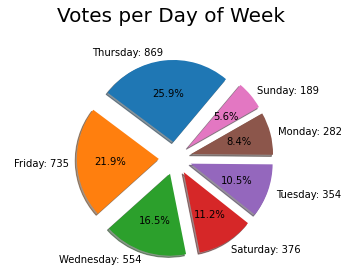

In [ ]:
p_labels = df_pie['Label']
p_size = df_pie['VotesCount']
p_explode = [0.2 for i in range(len(p_labels))]
plt.pie(p_size, startangle=50, explode = p_explode, shadow=True, autopct =
'%0.1f%%', labels = p_labels)
plt.title('Votes per Day of Week \n',fontsize=20)
plt.axis('equal')

plt.show()

# 3. List all comments created on September 19th, 2012

In [ ]:
# Using 'to_datetime' from 'Pandas' library in order to convert argument to datetime:

df_comments ['CreationDate'] = pd.to_datetime(df_comments['CreationDate'])

In [ ]:
# Create 'mask' in order to contain the comments created on September 19th, 2012:

mask = (df_comments ['CreationDate'] > '2012-09-19') & (df_comments['CreationDate'] < '2012-09-20')

df_comments [mask]

,PostId,Text,CreationDate,UserId
Id,,,,
3476,887,I had the same thoughts. I'm wondering if ther...,2012-09-19 10:34:12.983,233
3623,890,"hmmm he's described as ""an over-the-top public...",2012-09-19 18:23:37.193,126


# 4. List all users under the age of 33, living in London

In [ ]:
# Creating masks to contain users whose location and age (above 33) are not 'Null':

mask_not_null = ~df_users['Location'].isnull() & ~df_users['Age'].isnull()

mask_age_location = df_users['Location'].str.contains('London') & (df_users['Age'] > 33)

In [ ]:
df_users[mask_not_null & mask_age_location].head()

,Reputation,CreationDate,DisplayName,LastAccessDate,WebsiteUrl,Location,Age,AboutMe,Views,UpVotes,DownVotes
Id,,,,,,,,,,,
243,101,2011-12-08 18:33:07.063,H Bellamy,2011-12-22 19:23:44.517,NaN,"London, United Kingdom",51.0,NaN,0,0,0
366,863,2011-12-16 23:39:02.573,Mark Mayo,2014-01-16 11:59:00.283,http://www.marksmayo.com,"London, United Kingdom",34.0,<p>Completed a first class Honours Degree in C...,26,54,0
423,101,2011-12-21 17:52:18.590,Sklivvz,2014-09-10 15:01:18.887,http://sklivvz.com,"London, United Kingdom",43.0,"<p><strong><a href=""http://blog.stackoverflow....",1,0,0
729,111,2012-01-29 17:42:09.083,Robin Green,2014-08-27 20:23:20.720,http://www.greenrd.org/,"London, United Kingdom",35.0,<p>Java and Scala developer. In a previous lif...,6,3,0
920,101,2012-02-26 12:09:14.057,Owen Blacker,2014-03-27 17:53:06.377,http://owenblacker.wordpress.com,"London, United Kingdom",39.0,"<p>Technical lead at <a href=""http://www.iris-...",0,1,0


# Advanced Analysis



# 1. Display the number of votes for each post title

In [ ]:
# Merge objects with database-style join:

merge_posts_votes = df_posts.merge(df_votes, how='left', left_index=True, right_on='PostId')
merge_posts_votes.head(3)

# The 'PostId' column from the Votes table added to the Posts table, in order to display the number of votes for each post title:

,CreationDate_x,Score,ViewCount,Body,OwnerUserId,LastEditorUserId,LastEditDate,LastActivityDate,Title,Tags,ClosedDate,Year_created,Month_created,PostId,CreationDate_y,UserId,DayOfWeek
3.0,2011-11-30 19:15:54.070,25,1526,<p>Some comedian/actors are given creative fre...,1562,532,2013-09-25 14:15:14.257,2013-09-25 14:15:14.257,To what extent were the actors in Wedding Cras...,<wedding-crashers>,2011-12-24 19:15:54.070,2011,11,1,2011-11-30,231.0,Wednesday
12.0,2011-11-30 19:15:54.070,25,1526,<p>Some comedian/actors are given creative fre...,1562,532,2013-09-25 14:15:14.257,2013-09-25 14:15:14.257,To what extent were the actors in Wedding Cras...,<wedding-crashers>,2011-12-24 19:15:54.070,2011,11,1,2011-11-30,571.0,Wednesday
22.0,2011-11-30 19:15:54.070,25,1526,<p>Some comedian/actors are given creative fre...,1562,532,2013-09-25 14:15:14.257,2013-09-25 14:15:14.257,To what extent were the actors in Wedding Cras...,<wedding-crashers>,2011-12-24 19:15:54.070,2011,11,1,2011-11-30,556.0,Wednesday


In [ ]:
# Filtering the "Title" column from the previous table ('merge_posts_votes') by using 'groupby' operator.
# Using the 'count' function in order to count the number of votes for each post title.
# Renaming the 'Title' column in order to display the number of votes:  

merge_posts_votes.groupby('Title')['Title'].count()\
.to_frame()\
.rename(columns = {'Title':'NumOfVotes'})\
.sort_values('NumOfVotes', ascending = False)\
.head()

,NumOfVotes
Title,
Have there been other candidates to play Jack Reacher?,27
Where did the speaking-disease come from?,26
Was Disney's The Black Hole the last film to feature an overture?,26
"In The Departed, did the FBI know about the mole in the police department and did they interfere with the investigation?",25
Why does Harry only make use of time travel in The Prisoner of Azkaban?,23


# 2. Display posts with comments created by users living in the same location as the post creator

In [ ]:
# First, it is necessary to join the Posts and Comments tabls. 
# By joining the two, it is needed to rename the 'UserId' column from the Comments table, in order to clarify for what the column is referring to:
 
df_comments.rename(columns={'UserId':'CommentUserId'}, inplace=True)
comments_posts = df_posts.merge(df_comments, how='inner', left_index=True, right_on='PostId')\
[['Title', 'OwnerUserId', 'CommentUserId']]

# Creat a new variable that contains the deatails of the users who created the posts:

comments_posts_users_p = comments_posts.merge(df_users, how='inner', left_on='OwnerUserId', right_index=True)\
[['Title','OwnerUserId','CommentUserId', 'Location']]\
.rename(columns={'Location':'PostUserLoc'})

In [ ]:
comments_posts.head(2)

,Title,OwnerUserId,CommentUserId
Id,,,
1756,Evaluating characters by means of description,232,275
2230,Evaluating characters by means of description,232,143


In [ ]:
comments_posts_users_p.head(2)

,Title,OwnerUserId,CommentUserId,PostUserLoc
Id,,,,
1756,Evaluating characters by means of description,232,275,Pennsylvania
2230,Evaluating characters by means of description,232,143,Pennsylvania


In [ ]:
# Adding information about who wrote comments on the posts by creating a new variable :

comments_on_posts_users = comments_posts_users_p.merge(df_users, how='inner', left_on='CommentUserId', right_index=True)\
[['Title', 'OwnerUserId', 'CommentUserId', 'PostUserLoc', 'Location']]\
.rename(columns={'Location':'CommentUserLoc'})



In [ ]:
# Creating a variable that allows to reveal users who wrote comments on posts, that live at the same locations as the post authors:

posts_comments_same_loc = comments_on_posts_users['PostUserLoc'] ==  comments_on_posts_users ['CommentUserLoc']

comments_on_posts_users[posts_comments_same_loc]

,Title,OwnerUserId,CommentUserId,PostUserLoc,CommentUserLoc
Id,,,,,
1668,Was Monk's mother also OCD?,52,52,Missouri,Missouri
30,Thriller about a group of kidnappers wearing S...,1312,1312,"Sydney, Australia","Sydney, Australia"
2726,What is the Traitor's Motive?,1590,535,Canada,Canada
3809,Clarification about closing a loop in The Looper,1632,293,Sweden,Sweden
750,Is there more to Gandalf and Galadriel's relat...,835,1221,Sweden,Sweden


# 3. How many users have never voted ?

In [ ]:
merge_users_votes = df_users.merge(df_votes, how='left', left_index=True, right_on='UserId')

merge_users_votes[merge_users_votes['PostId'].isnull()] ['DisplayName'].count()

355

# 4. Display all posts having the highest amount of comments

In [ ]:
# Merging Posts & Comments, in order to display all posts having the highest amount of comments:

join_posts_comments = df_posts.merge(df_comments, how='inner', left_index=True, right_on= ['PostId'])\
.groupby('Title')['Title'].count()\
.sort_values (ascending = False)\
.to_frame()\
.rename(columns = {'Title':'CmnCount'})

# Ranking the amount of comments:

join_posts_comments ['RankCmnAmount'] = join_posts_comments['CmnCount'].rank(ascending = False, method = 'dense')

# RankCmnAmount == 1:

equl_to_1 = join_posts_comments ['RankCmnAmount'] == 1
join_posts_comments [equl_to_1]

,CmnCount,RankCmnAmount
Title,,
How do the 'frozen goods' survive the banana stand fire?,5,1.0
"In Iron Man, why is Tony Stark fooled for so long?",5,1.0
How does the budget breakdown for a US TV season compare to a UK TV Season?,5,1.0
Plot summaries for the other two movies related to Moon,5,1.0
Old movie about two pilots and a cheating wife,5,1.0
Who nukes the USA in The Divide?,5,1.0
Why doesn’t Shosanna try to kill Fredrick?,5,1.0
Aliens took over the satellite,5,1.0
"How much money did it take to run ""The Sting""?",5,1.0


# 5. For each post, how many votes are coming from users living in Canada? What’s their percentage of the total number of votes?

In [ ]:
# Merging Votes & Posts tables. The common column is 'PostId' (at the Votes table) and 'Id' (at the Posts table):

posts_votes = df_posts.merge(df_votes, how='inner', left_index=True, right_on=['PostId'], suffixes=('_pst', '_vot'))

In [ ]:
# Adding the third table, Users:

posts_votes_users = posts_votes.merge(df_users, how='inner', right_index=True, left_on='UserId') [['Title', 'Location']]\
.rename(columns ={'Location':'VoteLocation'})

In [ ]:
# Removing Null Values:

mask = ~posts_votes_users['VoteLocation'].isnull()
posts_votes_users = posts_votes_users[mask]

In [ ]:
# Locating the Vote count:

posts_votes_users_w = posts_votes_users.groupby('Title')['VoteLocation']\
.count()\
.to_frame()\
.rename(columns={'VoteLocation':'VoteLocation_WorldWide'})

In [ ]:
# The number of people (count) who voted from Canada:

mask = posts_votes_users['VoteLocation'].str.contains('Canada')
posts_votes_users_canada = posts_votes_users[mask]\
.groupby('Title')['VoteLocation']\
.count()\
.to_frame()\
.rename(columns= {'VoteLocation':'VoteLocation_Canada'})

In [ ]:
# In order to indicat the percentage of voters from Canada compared to the rest of the world, it is necessary to merge 'VoteLocation_WorldWide' & 'VoteLocation_Canada':

ww_ca = posts_votes_users_w.merge(posts_votes_users_canada, how='left', right_index=True, left_index=True)



In [ ]:
ww_ca ['Percent'] = ww_ca ['VoteLocation_Canada'] / ww_ca ['VoteLocation_WorldWide'] * 100

In [ ]:
ww_ca.head()

,VoteLocation_WorldWide,VoteLocation_Canada,Percent
Title,,,
"""Road"" picture about guys in a tank, possibly set in the Middle East",4,1.0,25.000000
"""Rock TV"" animated/live action series from the early to mid 80s",3,NaN,NaN
"""The Club"" where Jerry Seinfeld performed",1,NaN,NaN
"""There are two kinds of people"" quote",2,NaN,NaN
'80s Aquaman tv-series?,6,1.0,16.666667


# 6. How many hours in average, it takes to the first comment to be posted after a creation of a new post?

In [ ]:
# Finding the first Comment for each Post:

comments_time = df_comments.groupby('PostId') ['CreationDate'].min().to_frame()

In [ ]:
# Merging Comments & Posts tables.
# Using 'suffixes' because 'CreationDate' appears in both tables.

comments_posts_time = df_posts.merge(comments_time, how='inner', left_index=True, right_index=True, suffixes=('_posts', '_comments'))\
[['Title', 'CreationDate_posts', 'CreationDate_comments']]

# Calculating the average time:

comments_posts_time ['time_diff'] = (comments_posts_time['CreationDate_comments'] - comments_posts_time['CreationDate_posts'])/np.timedelta64 (1,'h')

comments_posts_time.head()

np.round(comments_posts_time['time_diff'].mean())


7.0

# 7. What's the most common post tag?

In [ ]:
# Creating list of separated Tags:

pst_tag = list(df_posts['Tags'].str.split('><'))

In [ ]:
# Creating 'For Loop' on an existing list:

tag_list = []
for sublist in pst_tag:
  for i in sublist:
    tag_list.append(i)

common_tag = pd.Series(tag_list).str.replace('<', '').str.replace('>', '').to_frame()

common_tag.columns = ['Tag']

common_tag.groupby('Tag')['Tag'].count().sort_values(ascending=False).head(1)

Tag
plot-explanation    665
Name: Tag, dtype: int64

# 8. Create a pivot table displaying how many posts were created for each year (Y axis) and each month (X axis)

In [ ]:
df_posts ['Year_created'] = df_posts['CreationDate'].dt.year
df_posts ['Month_created'] = df_posts['CreationDate'].dt.month

In [ ]:
pst_pivot = df_posts.pivot_table(index='Year_created', columns='Month_created', values='Title', aggfunc='count')

In [ ]:

pst_pivot_nan=pst_pivot.fillna(0)

pst_pivot_nan.index = pst_pivot_nan.index.astype(int)

pst_pivot_nan.head()



Month_created,1,2,3,4,5,6,7,8,9,10,11,12
Year_created,,,,,,,,,,,,
2011,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,15.0,140.0
2012,92.0,72.0,62.0,88.0,93.0,105.0,105.0,81.0,60.0,75.0,77.0,155.0
2013,129.0,99.0,107.0,92.0,130.0,120.0,134.0,143.0,64.0,0.0,0.0,0.0


In [ ]:
# Creating visualization of the results showed at the pivot table:

posts_created = {'Jan.': {2011: 0, 2012: 92, 2013: 129},
 'Feb.': {2011: 0, 2012: 72, 2013: 99},
 'Mar.': {2011: 0, 2012: 62, 2013: 107},
 'Apr.': {2011: 0, 2012: 88, 2013: 92},
 'May': {2011: 0, 2012: 93, 2013: 130},
 'Jun.': {2011: 0, 2012: 105, 2013: 120},
 'Jul.': {2011: 0, 2012: 105, 2013: 134},
 'Aug.': {2011: 0, 2012: 81, 2013: 143},
 'Sep.': {2011: 0, 2012: 60, 2013: 64},
 'Oct.': {2011: 1, 2012: 75, 2013: 0},
 'Nov.': {2011: 15, 2012: 77, 2013: 0},
 'Dec.': {2011: 140, 2012: 155, 2013: 0}}

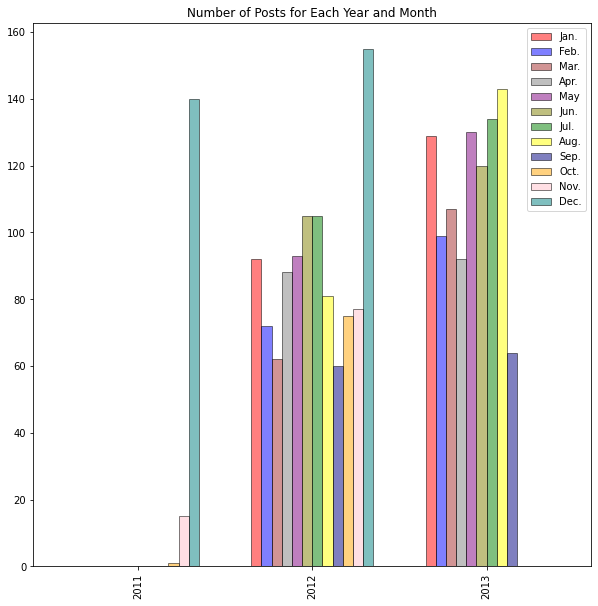

In [ ]:
pd.DataFrame(posts_created).plot.bar(width=0.7, color={'Jan.': "red", 'Feb.': "blue", 'Mar.': "brown", 'Apr.': "gray",\
                                                       'May': "purple", 'Jun.': "olive",\
                                                       'Jul.': "green", 'Aug.': "yellow", 'Sep.': "navy",\
                                                       'Oct.': "Orange", 'Nov.': "pink", 'Dec.': "teal"},\
                                                 figsize=(10,10),\
                                                edgecolor='black', alpha=0.5,\
                                                title = 'Number of Posts for Each Year and Month')
plt.show()